In [1]:
#import neccessary libraries
import tensorflow as tf
from tensorflow import keras 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
#load data from file
X_train = np.load('80/X_train.npy',allow_pickle=True)
y_train = np.load('80/y_train.npy',allow_pickle=True)
X_test = np.load('80/X_test.npy',allow_pickle=True)
y_test = np.load('80/y_test.npy',allow_pickle=True)
X_valid = np.load('80/X_valid.npy',allow_pickle=True)
y_valid = np.load('80/y_valid.npy',allow_pickle=True)

In [3]:
#shuffle array in same way
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_valid, y_valid= shuffle(X_valid, y_valid, random_state=0)

In [4]:
#rescale image
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [5]:
X_train = X_train[...,np.newaxis]
X_valid = X_valid[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [6]:
X_train.shape

(48300, 80, 80, 1)

In [7]:
X_test.shape

(16100, 80, 80, 1)

In [8]:
X_valid.shape

(16100, 80, 80, 1)

In [9]:
print(y_train)

[ 69  65  20 ...  81  84 106]


In [10]:
model = tf.keras.Sequential()

model.add(keras.layers.Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu', kernel_regularizer=regularizers.l2(l=0.01),input_shape=(80,80,1)))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))

model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(64,activation='relu'))

model.add(keras.layers.Dense(161,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [12]:
#optimizerr if output is integer use sparse
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
#perfomance
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),verbose=2)

Epoch 1/20
1510/1510 - 15s - loss: 3.1492 - accuracy: 0.2836 - val_loss: 1.9203 - val_accuracy: 0.5353
Epoch 2/20
1510/1510 - 11s - loss: 1.7466 - accuracy: 0.5693 - val_loss: 1.3120 - val_accuracy: 0.6820
Epoch 3/20
1510/1510 - 11s - loss: 1.3687 - accuracy: 0.6573 - val_loss: 1.0847 - val_accuracy: 0.7381
Epoch 4/20
1510/1510 - 11s - loss: 1.1613 - accuracy: 0.7110 - val_loss: 0.9498 - val_accuracy: 0.7703
Epoch 5/20
1510/1510 - 11s - loss: 1.0265 - accuracy: 0.7458 - val_loss: 0.8338 - val_accuracy: 0.8040
Epoch 6/20
1510/1510 - 12s - loss: 0.9139 - accuracy: 0.7741 - val_loss: 0.7776 - val_accuracy: 0.8161
Epoch 7/20
1510/1510 - 11s - loss: 0.8281 - accuracy: 0.7959 - val_loss: 0.7405 - val_accuracy: 0.8272
Epoch 8/20
1510/1510 - 11s - loss: 0.7569 - accuracy: 0.8127 - val_loss: 0.6765 - val_accuracy: 0.8430
Epoch 9/20
1510/1510 - 11s - loss: 0.6989 - accuracy: 0.8281 - val_loss: 0.6417 - val_accuracy: 0.8534
Epoch 10/20
1510/1510 - 11s - loss: 0.6440 - accuracy: 0.8435 - val_loss:

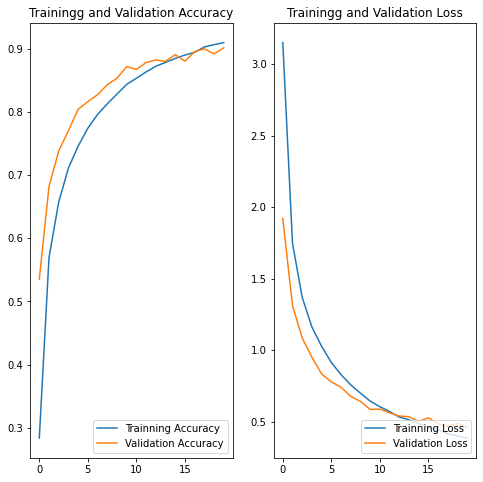

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20) #num of epoch

plt.figure(figsize=(8,8))

#1 row 2 columnn
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Trainning Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainingg and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Trainning Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Trainingg and Validation Loss")
plt.show()

In [15]:
score = model.evaluate(X_test,y_test)
print(score)

504/504 [==============================] - 4s 8ms/step - loss: 0.4690 - accuracy: 0.8971
[0.4690314829349518, 0.8970807194709778]


In [16]:
X_new = X_test[0:15]
y_pred = model.predict(X_new)
print(np.argmax(y_pred,axis=-1)) #predicted label
print(y_test[0:15]) #actual label

[ 89 104  52  81 130  69  21  98  22  53 116  24  11  96   9]
[ 89 104  52  81  34  69  21  98  22  53 116  24  11  96   9]


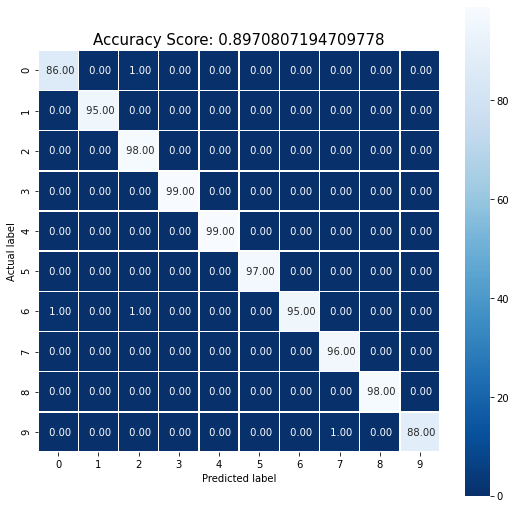

In [17]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm[0:10,0:10], annot=True, fmt=" .2f", linewidth=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title('Accuracy Score: {0}'.format(score[1]), size=15)
plt.show()

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       100
           1       0.97      0.95      0.96       100
           2       0.93      0.98      0.96       100
           3       0.99      0.99      0.99       100
           4       0.95      0.99      0.97       100
           5       0.96      0.97      0.97       100
           6       0.97      0.95      0.96       100
           7       0.93      0.96      0.95       100
           8       0.81      0.98      0.89       100
           9       0.92      0.88      0.90       100
          10       0.83      0.95      0.89       100
          11       0.92      0.99      0.95       100
          12       0.81      0.88      0.84       100
          13       0.77      0.88      0.82       100
          14       1.00      0.97      0.98       100
          15       0.75      0.97      0.84       100
          16       0.81      0.85      0.83       100
          17       0.95    